In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

13it [00:00, 129.67it/s]

31it [00:00, 140.89it/s]

49it [00:00, 149.59it/s]

62it [00:00, 118.80it/s]

80it [00:00, 132.10it/s]

99it [00:00, 143.71it/s]

114it [00:00, 135.17it/s]

132it [00:00, 145.98it/s]

149it [00:01, 150.80it/s]

165it [00:01, 135.71it/s]

182it [00:01, 143.56it/s]

201it [00:01, 153.96it/s]

220it [00:01, 161.69it/s]

239it [00:01, 168.30it/s]

257it [00:01, 145.27it/s]

273it [00:01, 140.86it/s]

291it [00:01, 149.81it/s]

310it [00:02, 158.48it/s]

328it [00:02, 162.53it/s]

347it [00:02, 168.53it/s]

366it [00:02, 174.24it/s]

385it [00:02, 177.72it/s]

404it [00:02, 180.16it/s]

423it [00:02, 181.46it/s]

442it [00:02, 181.50it/s]

461it [00:02, 181.26it/s]

480it [00:02, 180.89it/s]

499it [00:03, 180.98it/s]

518it [00:03, 155.46it/s]

537it [00:03, 163.32it/s]

556it [00:03, 168.15it/s]

575it [00:03, 172.27it/s]

593it [00:03, 173.50it/s]

612it [00:03, 175.99it/s]

631it [00:03, 179.16it/s]

650it [00:03, 180.28it/s]

669it [00:04, 166.55it/s]

688it [00:04, 171.17it/s]

706it [00:04, 170.37it/s]

725it [00:04, 173.48it/s]

744it [00:04, 176.63it/s]

762it [00:04, 177.19it/s]

780it [00:04, 177.67it/s]

798it [00:04, 175.77it/s]

816it [00:04, 172.94it/s]

834it [00:05, 173.59it/s]

852it [00:05, 152.92it/s]

868it [00:05, 140.28it/s]

883it [00:05, 131.43it/s]

900it [00:05, 139.22it/s]

917it [00:05, 147.15it/s]

935it [00:05, 155.31it/s]

954it [00:05, 162.27it/s]

971it [00:06, 146.56it/s]

987it [00:06, 138.51it/s]

1002it [00:06, 139.77it/s]

1021it [00:06, 149.96it/s]

1040it [00:06, 158.21it/s]

1058it [00:06, 161.90it/s]

1076it [00:06, 166.66it/s]

1093it [00:06, 140.28it/s]

1108it [00:06, 135.22it/s]

1123it [00:07, 128.62it/s]

1137it [00:07, 130.53it/s]

1151it [00:07, 129.75it/s]

1170it [00:07, 142.45it/s]

1190it [00:07, 153.85it/s]

1208it [00:07, 160.48it/s]

1227it [00:07, 167.42it/s]

1247it [00:07, 173.66it/s]

1266it [00:07, 176.62it/s]

1285it [00:08, 178.98it/s]

1304it [00:08, 181.97it/s]

1323it [00:08, 181.84it/s]

1342it [00:08, 176.82it/s]

1361it [00:08, 178.56it/s]

1380it [00:08, 181.42it/s]

1399it [00:08, 182.79it/s]

1418it [00:08, 157.24it/s]

1435it [00:08, 144.95it/s]

1451it [00:09, 142.32it/s]

1466it [00:09, 143.98it/s]

1485it [00:09, 153.60it/s]

1504it [00:09, 160.91it/s]

1522it [00:09, 166.16it/s]

1539it [00:09, 161.49it/s]

1558it [00:09, 168.47it/s]

1576it [00:09, 171.51it/s]

1595it [00:09, 174.04it/s]

1613it [00:09, 171.62it/s]

1631it [00:10, 172.46it/s]

1650it [00:10, 175.49it/s]

1668it [00:10, 148.83it/s]

1684it [00:10, 151.93it/s]

1703it [00:10, 160.93it/s]

1721it [00:10, 165.06it/s]

1740it [00:10, 168.90it/s]

1759it [00:10, 173.02it/s]

1777it [00:10, 174.92it/s]

1795it [00:11, 144.41it/s]

1813it [00:11, 151.51it/s]

1831it [00:11, 157.39it/s]

1849it [00:11, 162.49it/s]

1868it [00:11, 167.83it/s]

1887it [00:11, 172.70it/s]

1906it [00:11, 176.41it/s]

1924it [00:11, 171.49it/s]

1942it [00:11, 173.88it/s]

1961it [00:12, 176.27it/s]

1980it [00:12, 178.02it/s]

1998it [00:12, 178.03it/s]

2016it [00:12, 178.52it/s]

2035it [00:12, 181.06it/s]

2054it [00:12, 181.23it/s]

2073it [00:12, 181.21it/s]

2092it [00:12, 181.30it/s]

2111it [00:12, 174.24it/s]

2129it [00:13, 159.76it/s]

2147it [00:13, 164.29it/s]

2165it [00:13, 166.78it/s]

2184it [00:13, 171.38it/s]

2203it [00:13, 174.64it/s]

2221it [00:13, 175.24it/s]

2239it [00:13, 175.98it/s]

2257it [00:13, 176.62it/s]

2275it [00:13, 177.13it/s]

2293it [00:14, 171.27it/s]

2311it [00:14, 162.92it/s]

2329it [00:14, 167.50it/s]

2348it [00:14, 171.36it/s]

2367it [00:14, 174.56it/s]

2386it [00:14, 176.04it/s]

2405it [00:14, 178.00it/s]

2424it [00:14, 180.14it/s]

2443it [00:14, 178.25it/s]

2461it [00:14, 178.40it/s]

2479it [00:15, 173.52it/s]

2497it [00:15, 164.20it/s]

2514it [00:15, 165.73it/s]

2533it [00:15, 171.40it/s]

2552it [00:15, 176.06it/s]

2571it [00:15, 178.96it/s]

2590it [00:15, 180.76it/s]

2609it [00:15, 181.84it/s]

2628it [00:15, 182.72it/s]

2647it [00:16, 183.33it/s]

2666it [00:16, 184.87it/s]

2685it [00:16, 184.27it/s]

2704it [00:16, 183.78it/s]

2723it [00:16, 183.27it/s]

2742it [00:16, 183.97it/s]

2761it [00:16, 182.20it/s]

2780it [00:16, 172.82it/s]

2798it [00:16, 173.49it/s]

2816it [00:16, 166.23it/s]

2835it [00:17, 171.22it/s]

2854it [00:17, 175.16it/s]

2873it [00:17, 179.05it/s]

2892it [00:17, 181.09it/s]

2911it [00:17, 181.91it/s]

2930it [00:17, 176.93it/s]

2949it [00:17, 178.60it/s]

2967it [00:17, 170.37it/s]

2985it [00:17, 159.86it/s]

3003it [00:18, 164.55it/s]

3022it [00:18, 170.13it/s]

3041it [00:18, 172.84it/s]

3060it [00:18, 175.82it/s]

3079it [00:18, 179.07it/s]

3098it [00:18, 180.65it/s]

3117it [00:18, 179.15it/s]

3135it [00:18, 155.83it/s]

3152it [00:18, 140.04it/s]

3170it [00:19, 148.53it/s]

3189it [00:19, 156.70it/s]

3208it [00:19, 163.35it/s]

3227it [00:19, 169.54it/s]

3245it [00:19, 157.40it/s]

3262it [00:19, 155.61it/s]

3280it [00:19, 161.87it/s]

3298it [00:19, 166.51it/s]

3317it [00:19, 170.50it/s]

3335it [00:20, 169.80it/s]

3354it [00:20, 173.57it/s]

3373it [00:20, 176.13it/s]

3391it [00:20, 175.27it/s]

3409it [00:20, 166.05it/s]

3427it [00:20, 169.98it/s]

3446it [00:20, 174.58it/s]

3465it [00:20, 177.21it/s]

3483it [00:20, 177.71it/s]

3501it [00:20, 178.17it/s]

3520it [00:21, 178.24it/s]

3539it [00:21, 179.63it/s]

3557it [00:21, 179.59it/s]

3575it [00:21, 178.22it/s]

3593it [00:21, 177.26it/s]

3611it [00:21, 177.47it/s]

3629it [00:21, 178.22it/s]

3647it [00:21, 178.74it/s]

3666it [00:21, 180.43it/s]

3685it [00:22, 160.93it/s]

3704it [00:22, 168.00it/s]

3723it [00:22, 173.67it/s]

3742it [00:22, 177.32it/s]

3761it [00:22, 178.41it/s]

3780it [00:22, 179.39it/s]

3799it [00:22, 178.80it/s]

3817it [00:22, 178.85it/s]

3836it [00:22, 179.14it/s]

3854it [00:22, 179.06it/s]

3872it [00:23, 172.39it/s]

3890it [00:23, 156.25it/s]

3906it [00:23, 156.14it/s]

3923it [00:23, 159.98it/s]

3940it [00:23, 161.06it/s]

3957it [00:23, 162.05it/s]

3974it [00:23, 163.67it/s]

3991it [00:23, 162.88it/s]

4010it [00:23, 168.57it/s]

4029it [00:24, 172.55it/s]

4048it [00:24, 176.38it/s]

4067it [00:24, 178.32it/s]

4085it [00:24, 177.16it/s]

4104it [00:24, 178.40it/s]

4122it [00:24, 171.36it/s]

4141it [00:24, 174.81it/s]

4159it [00:24, 175.33it/s]

4178it [00:24, 177.55it/s]

4196it [00:25, 175.37it/s]

4214it [00:25, 170.38it/s]

4233it [00:25, 173.97it/s]

4251it [00:25, 172.12it/s]

4269it [00:25, 173.02it/s]

4287it [00:25, 173.13it/s]

4305it [00:25, 170.17it/s]

4323it [00:25, 168.53it/s]

4341it [00:25, 169.98it/s]

4359it [00:25, 169.95it/s]

4377it [00:26, 151.94it/s]

4393it [00:26, 152.64it/s]

4411it [00:26, 159.82it/s]

4428it [00:26, 152.61it/s]

4444it [00:26, 142.18it/s]

4459it [00:26, 142.90it/s]

4476it [00:26, 148.04it/s]

4492it [00:26, 151.35it/s]

4509it [00:26, 155.29it/s]

4525it [00:27, 155.57it/s]

4541it [00:27, 153.96it/s]

4560it [00:27, 161.19it/s]

4579it [00:27, 167.62it/s]

4597it [00:27, 170.11it/s]

4615it [00:27, 164.60it/s]

4632it [00:27, 164.21it/s]

4650it [00:27, 166.62it/s]

4667it [00:27, 166.05it/s]

4684it [00:28, 166.78it/s]

4702it [00:28, 169.00it/s]

4721it [00:28, 173.49it/s]

4740it [00:28, 176.01it/s]

4758it [00:28, 164.81it/s]

4775it [00:28, 164.76it/s]

4794it [00:28, 170.44it/s]

4813it [00:28, 174.16it/s]

4831it [00:28, 173.25it/s]

4850it [00:28, 175.57it/s]

4868it [00:29, 176.87it/s]

4887it [00:29, 178.92it/s]

4906it [00:29, 181.40it/s]

4925it [00:29, 181.02it/s]

4944it [00:29, 181.11it/s]

4963it [00:29, 180.94it/s]

4982it [00:29, 179.69it/s]

5000it [00:29, 162.47it/s]

5019it [00:29, 168.01it/s]

5037it [00:30, 167.75it/s]

5056it [00:30, 172.37it/s]

5075it [00:30, 176.02it/s]

5093it [00:30, 176.66it/s]

5111it [00:30, 165.24it/s]

5130it [00:30, 170.78it/s]

5149it [00:30, 173.81it/s]

5168it [00:30, 177.55it/s]

5186it [00:30, 177.76it/s]

5205it [00:31, 179.02it/s]

5224it [00:31, 180.19it/s]

5243it [00:31, 181.56it/s]

5262it [00:31, 183.29it/s]

5281it [00:31, 183.89it/s]

5300it [00:31, 183.99it/s]

5319it [00:31, 183.84it/s]

5338it [00:31, 175.00it/s]

5357it [00:31, 177.90it/s]

5375it [00:31, 178.06it/s]

5394it [00:32, 179.84it/s]

5413it [00:32, 180.72it/s]

5432it [00:32, 178.84it/s]

5450it [00:32, 179.05it/s]

5468it [00:32, 178.21it/s]

5486it [00:32, 173.35it/s]

5504it [00:32, 175.26it/s]

5522it [00:32, 152.98it/s]

5538it [00:32, 148.05it/s]

5556it [00:33, 156.30it/s]

5573it [00:33, 153.45it/s]

5592it [00:33, 162.43it/s]

5611it [00:33, 167.96it/s]

5630it [00:33, 172.53it/s]

5648it [00:33, 171.91it/s]

5666it [00:33, 173.31it/s]

5684it [00:33, 173.90it/s]

5702it [00:33, 174.74it/s]

5720it [00:33, 175.56it/s]

5738it [00:34, 170.62it/s]

5756it [00:34, 153.34it/s]

5775it [00:34, 161.90it/s]

5794it [00:34, 169.01it/s]

5813it [00:34, 172.70it/s]

5832it [00:34, 176.15it/s]

5850it [00:34, 139.44it/s]

5868it [00:34, 148.98it/s]

5887it [00:35, 157.38it/s]

5904it [00:35, 147.73it/s]

5923it [00:35, 158.19it/s]

5942it [00:35, 164.83it/s]

5961it [00:35, 169.68it/s]

5979it [00:35, 171.41it/s]

5997it [00:35, 168.72it/s]

6015it [00:35, 169.11it/s]

6034it [00:35, 174.54it/s]

6053it [00:36, 178.75it/s]

6073it [00:36, 182.15it/s]

6092it [00:36, 183.80it/s]

6111it [00:36, 185.03it/s]

6130it [00:36, 186.30it/s]

6149it [00:36, 185.88it/s]

6168it [00:36, 184.47it/s]

6187it [00:36, 183.23it/s]

6206it [00:36, 182.81it/s]

6225it [00:36, 183.17it/s]

6244it [00:37, 182.22it/s]

6263it [00:37, 159.41it/s]

6280it [00:37, 147.94it/s]

6297it [00:37, 152.28it/s]

6314it [00:37, 151.78it/s]

6330it [00:37, 146.71it/s]

6349it [00:37, 155.59it/s]

6367it [00:37, 161.99it/s]

6385it [00:37, 166.88it/s]

6404it [00:38, 170.81it/s]

6423it [00:38, 174.05it/s]

6442it [00:38, 176.30it/s]

6460it [00:38, 175.84it/s]

6478it [00:38, 176.26it/s]

6496it [00:38, 177.01it/s]

6515it [00:38, 178.64it/s]

6534it [00:38, 181.00it/s]

6553it [00:38, 182.49it/s]

6572it [00:39, 184.62it/s]

6591it [00:39, 185.17it/s]

6610it [00:39, 183.68it/s]

6629it [00:39, 183.42it/s]

6648it [00:39, 183.45it/s]

6667it [00:39, 181.94it/s]

6686it [00:39, 181.59it/s]

6705it [00:39, 152.59it/s]

6722it [00:39, 143.26it/s]

6737it [00:40, 137.18it/s]

6752it [00:40, 137.41it/s]

6771it [00:40, 148.82it/s]

6787it [00:40, 139.84it/s]

6802it [00:40, 135.29it/s]

6816it [00:40, 131.74it/s]

6830it [00:40, 132.05it/s]

6849it [00:40, 144.52it/s]

6864it [00:40, 144.90it/s]

6883it [00:41, 154.78it/s]

6902it [00:41, 162.39it/s]

6921it [00:41, 167.51it/s]

6939it [00:41, 170.00it/s]

6957it [00:41, 172.05it/s]

6975it [00:41, 173.16it/s]

6994it [00:41, 175.60it/s]

7012it [00:41, 157.16it/s]

7029it [00:41, 154.44it/s]

7048it [00:42, 162.89it/s]

7067it [00:42, 169.23it/s]

7086it [00:42, 174.64it/s]

7105it [00:42, 177.79it/s]

7124it [00:42, 180.53it/s]

7143it [00:42, 181.41it/s]

7162it [00:42, 176.64it/s]

7180it [00:42, 176.78it/s]

7199it [00:42, 178.85it/s]

7217it [00:42, 178.81it/s]

7236it [00:43, 179.67it/s]

7254it [00:43, 178.47it/s]

7273it [00:43, 179.15it/s]

7291it [00:43, 179.14it/s]

7310it [00:43, 179.85it/s]

7329it [00:43, 180.76it/s]

7348it [00:43, 178.26it/s]

7366it [00:43, 178.09it/s]

7384it [00:43, 176.55it/s]

7403it [00:43, 178.12it/s]

7422it [00:44, 179.29it/s]

7440it [00:44, 179.14it/s]

7459it [00:44, 179.69it/s]

7477it [00:44, 158.33it/s]

7494it [00:44, 155.19it/s]

7510it [00:44, 149.78it/s]

7528it [00:44, 156.48it/s]

7544it [00:44, 144.70it/s]

7559it [00:45, 137.90it/s]

7574it [00:45, 133.33it/s]

7592it [00:45, 143.08it/s]

7607it [00:45, 132.80it/s]

7621it [00:45, 127.67it/s]

7635it [00:45, 126.15it/s]

7649it [00:45, 129.81it/s]

7663it [00:45, 131.92it/s]

7682it [00:45, 144.76it/s]

7700it [00:46, 153.07it/s]

7716it [00:46, 140.60it/s]

7731it [00:46, 133.74it/s]

7745it [00:46, 129.67it/s]

7763it [00:46, 140.44it/s]

7782it [00:46, 152.17it/s]

7801it [00:46, 160.08it/s]

7820it [00:46, 167.01it/s]

7839it [00:46, 171.61it/s]

7858it [00:47, 175.30it/s]

7876it [00:47, 170.97it/s]

7895it [00:47, 175.29it/s]

7914it [00:47, 177.21it/s]

7933it [00:47, 179.11it/s]

7952it [00:47, 177.75it/s]

7971it [00:47, 178.77it/s]

7989it [00:47, 148.07it/s]

8007it [00:47, 154.85it/s]

8024it [00:48, 156.28it/s]

8042it [00:48, 161.50it/s]

8060it [00:48, 161.92it/s]

8077it [00:48, 147.84it/s]

8096it [00:48, 156.64it/s]

8115it [00:48, 163.31it/s]

8133it [00:48, 167.53it/s]

8151it [00:48, 170.19it/s]

8170it [00:48, 172.58it/s]

8188it [00:49, 153.03it/s]

8205it [00:49, 155.83it/s]

8223it [00:49, 160.40it/s]

8241it [00:49, 163.79it/s]

8259it [00:49, 166.78it/s]

8276it [00:49, 160.67it/s]

8293it [00:49, 147.09it/s]

8311it [00:49, 153.97it/s]

8330it [00:49, 161.07it/s]

8349it [00:50, 167.38it/s]

8368it [00:50, 171.29it/s]

8387it [00:50, 174.60it/s]

8405it [00:50, 175.10it/s]

8423it [00:50, 175.77it/s]

8441it [00:50, 171.88it/s]

8459it [00:50, 172.80it/s]

8477it [00:50, 174.85it/s]

8496it [00:50, 176.48it/s]

8514it [00:51, 159.05it/s]

8531it [00:51, 150.67it/s]

8547it [00:51, 152.67it/s]

8566it [00:51, 160.01it/s]

8583it [00:51, 157.05it/s]

8600it [00:51, 158.71it/s]

8619it [00:51, 165.30it/s]

8638it [00:51, 171.24it/s]

8657it [00:51, 169.92it/s]

8675it [00:52, 147.72it/s]

8693it [00:52, 155.77it/s]

8712it [00:52, 164.49it/s]

8731it [00:52, 170.17it/s]

8750it [00:52, 173.35it/s]

8768it [00:52, 175.27it/s]

8787it [00:52, 177.47it/s]

8806it [00:52, 179.69it/s]

8825it [00:52, 181.04it/s]

8844it [00:52, 180.30it/s]

8863it [00:53, 181.35it/s]

8882it [00:53, 181.17it/s]

8901it [00:53, 155.08it/s]

8918it [00:53, 127.63it/s]

8933it [00:53, 103.07it/s]

8952it [00:53, 118.38it/s]

8970it [00:53, 131.41it/s]

8987it [00:54, 139.41it/s]

9005it [00:54, 149.00it/s]

9023it [00:54, 156.93it/s]

9042it [00:54, 163.95it/s]

9061it [00:54, 168.62it/s]

9079it [00:54, 165.76it/s]

9098it [00:54, 170.14it/s]

9117it [00:54, 174.92it/s]

9135it [00:54, 176.15it/s]

9154it [00:54, 177.67it/s]

9172it [00:55, 178.22it/s]

9190it [00:55, 176.91it/s]

9208it [00:55, 170.35it/s]

9227it [00:55, 174.94it/s]

9246it [00:55, 177.57it/s]

9265it [00:55, 179.18it/s]

9284it [00:55, 179.57it/s]

9302it [00:55, 177.71it/s]

9320it [00:55, 178.35it/s]

9338it [00:56, 178.46it/s]

9357it [00:56, 179.20it/s]

9375it [00:56, 179.37it/s]

9394it [00:56, 180.59it/s]

9413it [00:56, 159.40it/s]

9430it [00:56, 146.17it/s]

9446it [00:56, 146.30it/s]

9462it [00:56, 148.67it/s]

9481it [00:56, 157.04it/s]

9500it [00:57, 163.90it/s]

9519it [00:57, 170.81it/s]

9538it [00:57, 175.25it/s]

9557it [00:57, 178.29it/s]

9576it [00:57, 178.30it/s]

9595it [00:57, 179.89it/s]

9614it [00:57, 178.43it/s]

9633it [00:57, 179.62it/s]

9652it [00:57, 178.41it/s]

9670it [00:57, 171.70it/s]

9689it [00:58, 174.34it/s]

9707it [00:58, 166.76it/s]

9724it [00:58, 164.21it/s]

9741it [00:58, 163.91it/s]

9759it [00:58, 168.41it/s]

9776it [00:58, 154.06it/s]

9792it [00:58, 146.44it/s]

9810it [00:58, 155.05it/s]

9828it [00:58, 161.28it/s]

9847it [00:59, 167.17it/s]

9864it [00:59, 162.78it/s]

9881it [00:59, 160.96it/s]

9900it [00:59, 166.48it/s]

9918it [00:59, 170.07it/s]

9936it [00:59, 171.88it/s]

9954it [00:59, 167.97it/s]

9973it [00:59, 172.59it/s]

9992it [00:59, 176.21it/s]

10010it [01:00, 175.74it/s]

10028it [01:00, 176.11it/s]

10046it [01:00, 175.25it/s]

10064it [01:00, 176.42it/s]

10082it [01:00, 161.93it/s]

10100it [01:00, 164.60it/s]

10119it [01:00, 170.26it/s]

10138it [01:00, 174.87it/s]

10157it [01:00, 177.20it/s]

10176it [01:00, 179.30it/s]

10195it [01:01, 180.16it/s]

10214it [01:01, 180.12it/s]

10233it [01:01, 156.41it/s]

10250it [01:01, 133.47it/s]

10265it [01:01, 130.81it/s]

10281it [01:01, 137.33it/s]

10300it [01:01, 148.70it/s]

10319it [01:01, 157.97it/s]

10338it [01:02, 165.52it/s]

10357it [01:02, 170.80it/s]

10376it [01:02, 173.53it/s]

10394it [01:02, 162.76it/s]

10411it [01:02, 156.66it/s]

10430it [01:02, 163.50it/s]

10448it [01:02, 166.86it/s]

10467it [01:02, 170.88it/s]

10486it [01:02, 174.18it/s]

10505it [01:03, 177.10it/s]

10524it [01:03, 178.54it/s]

10542it [01:03, 159.59it/s]

10561it [01:03, 166.06it/s]

10580it [01:03, 170.25it/s]

10598it [01:03, 172.58it/s]

10617it [01:03, 174.86it/s]

10635it [01:03, 175.67it/s]

10655it [01:03, 180.54it/s]

10674it [01:04, 179.16it/s]

10693it [01:04, 179.79it/s]

10712it [01:04, 179.09it/s]

10731it [01:04, 181.78it/s]

10750it [01:04, 180.96it/s]

10769it [01:04, 182.89it/s]

10788it [01:04, 180.48it/s]

10807it [01:04, 179.01it/s]

10825it [01:04, 168.59it/s]

10842it [01:04, 157.73it/s]

10860it [01:05, 163.05it/s]

10878it [01:05, 166.94it/s]

10897it [01:05, 171.57it/s]

10916it [01:05, 174.32it/s]

10934it [01:05, 174.85it/s]

10953it [01:05, 177.56it/s]

10972it [01:05, 179.13it/s]

10990it [01:05, 155.92it/s]

11007it [01:06, 132.18it/s]

11022it [01:06, 127.62it/s]

11038it [01:06, 135.64it/s]

11057it [01:06, 146.30it/s]

11074it [01:06, 152.02it/s]

11093it [01:06, 160.92it/s]

11112it [01:06, 166.60it/s]

11130it [01:06, 167.38it/s]

11148it [01:06, 169.03it/s]

11166it [01:06, 168.75it/s]

11185it [01:07, 173.65it/s]

11204it [01:07, 176.28it/s]

11223it [01:07, 179.73it/s]

11242it [01:07, 182.63it/s]

11262it [01:07, 184.41it/s]

11281it [01:07, 171.99it/s]

11300it [01:07, 175.27it/s]

11319it [01:07, 179.03it/s]

11338it [01:07, 180.84it/s]

11357it [01:08, 179.55it/s]

11376it [01:08, 165.45it/s]

11393it [01:08, 136.55it/s]

11408it [01:08, 132.43it/s]

11422it [01:08, 130.28it/s]

11440it [01:08, 140.40it/s]

11456it [01:08, 144.81it/s]

11473it [01:08, 151.03it/s]

11491it [01:09, 156.32it/s]

11507it [01:09, 149.43it/s]

11523it [01:09, 143.99it/s]

11541it [01:09, 152.95it/s]

11557it [01:09, 140.72it/s]

11575it [01:09, 149.23it/s]

11594it [01:09, 158.20it/s]

11613it [01:09, 165.74it/s]

11632it [01:09, 171.10it/s]

11650it [01:09, 172.82it/s]

11668it [01:10, 154.24it/s]

11684it [01:10, 146.11it/s]

11700it [01:10, 122.81it/s]

11719it [01:10, 137.17it/s]

11736it [01:10, 145.55it/s]

11752it [01:10, 146.12it/s]

11770it [01:10, 154.49it/s]

11789it [01:10, 161.44it/s]

11808it [01:11, 167.48it/s]

11827it [01:11, 172.70it/s]

11845it [01:11, 127.64it/s]

11860it [01:11, 110.89it/s]

11878it [01:11, 125.32it/s]

11896it [01:11, 137.20it/s]

11915it [01:11, 149.06it/s]

11929it [01:11, 165.80it/s]


0it [00:00, ?it/s]

18it [00:00, 174.36it/s]

38it [00:00, 181.13it/s]

58it [00:00, 185.30it/s]

78it [00:00, 188.57it/s]

98it [00:00, 190.47it/s]

118it [00:00, 192.64it/s]

137it [00:00, 189.20it/s]

155it [00:00, 182.49it/s]

175it [00:00, 186.91it/s]

194it [00:01, 184.54it/s]

214it [00:01, 188.17it/s]

234it [00:01, 189.27it/s]

255it [00:01, 193.73it/s]

275it [00:01, 183.54it/s]

294it [00:01, 165.58it/s]

314it [00:01, 172.64it/s]

335it [00:01, 180.71it/s]

356it [00:01, 186.96it/s]

376it [00:02, 190.13it/s]

396it [00:02, 189.15it/s]

417it [00:02, 192.54it/s]

438it [00:02, 195.28it/s]

459it [00:02, 198.51it/s]

480it [00:02, 199.88it/s]

501it [00:02, 199.37it/s]

521it [00:02, 198.87it/s]

542it [00:02, 199.35it/s]

562it [00:03, 170.99it/s]

580it [00:03, 151.13it/s]

600it [00:03, 161.85it/s]

620it [00:03, 171.33it/s]

638it [00:03, 158.92it/s]

656it [00:03, 163.73it/s]

676it [00:03, 170.72it/s]

695it [00:03, 173.96it/s]

717it [00:03, 183.58it/s]

736it [00:04, 181.06it/s]

757it [00:04, 186.89it/s]

778it [00:04, 191.87it/s]

798it [00:04, 187.06it/s]

819it [00:04, 193.03it/s]

840it [00:04, 197.09it/s]

861it [00:04, 200.29it/s]

882it [00:04, 202.23it/s]

903it [00:04, 204.02it/s]

924it [00:04, 204.40it/s]

945it [00:05, 202.84it/s]

966it [00:05, 202.67it/s]

987it [00:05, 201.71it/s]

1008it [00:05, 200.05it/s]

1029it [00:05, 189.62it/s]

1049it [00:05, 191.40it/s]

1069it [00:05, 188.44it/s]

1089it [00:05, 191.58it/s]

1109it [00:05, 191.83it/s]

1130it [00:06, 196.33it/s]

1151it [00:06, 198.29it/s]

1171it [00:06, 198.68it/s]

1192it [00:06, 199.92it/s]

1213it [00:06, 202.30it/s]

1234it [00:06, 200.48it/s]

1255it [00:06, 200.91it/s]

1276it [00:06, 201.00it/s]

1297it [00:06, 193.11it/s]

1317it [00:06, 194.03it/s]

1337it [00:07, 195.37it/s]

1358it [00:07, 197.91it/s]

1378it [00:07, 178.34it/s]

1398it [00:07, 184.10it/s]

1418it [00:07, 187.60it/s]

1438it [00:07, 189.71it/s]

1458it [00:07, 192.14it/s]

1478it [00:07, 194.09it/s]

1499it [00:07, 197.92it/s]

1520it [00:08, 199.31it/s]

1541it [00:08, 201.80it/s]

1562it [00:08, 201.40it/s]

1583it [00:08, 201.22it/s]

1604it [00:08, 201.79it/s]

1625it [00:08, 201.02it/s]

1646it [00:08, 201.28it/s]

1667it [00:08, 167.14it/s]

1685it [00:08, 156.44it/s]

1705it [00:09, 166.63it/s]

1726it [00:09, 175.80it/s]

1746it [00:09, 182.10it/s]

1765it [00:09, 172.10it/s]

1786it [00:09, 180.15it/s]

1805it [00:09, 179.08it/s]

1826it [00:09, 185.49it/s]

1847it [00:09, 189.91it/s]

1868it [00:09, 193.56it/s]

1888it [00:09, 195.24it/s]

1908it [00:10, 195.83it/s]

1928it [00:10, 196.64it/s]

1948it [00:10, 194.58it/s]

1968it [00:10, 195.45it/s]

1988it [00:10, 187.01it/s]

2007it [00:10, 182.79it/s]

2026it [00:10, 183.40it/s]

2046it [00:10, 187.86it/s]

2067it [00:10, 191.96it/s]

2087it [00:11, 192.54it/s]

2107it [00:11, 194.48it/s]

2127it [00:11, 194.52it/s]

2147it [00:11, 175.78it/s]

2166it [00:11, 177.96it/s]

2187it [00:11, 185.22it/s]

2208it [00:11, 190.38it/s]

2228it [00:11, 192.51it/s]

2248it [00:11, 193.94it/s]

2268it [00:11, 195.39it/s]

2289it [00:12, 197.40it/s]

2309it [00:12, 195.40it/s]

2330it [00:12, 198.04it/s]

2351it [00:12, 200.60it/s]

2372it [00:12, 199.49it/s]

2392it [00:12, 192.08it/s]

2412it [00:12, 192.59it/s]

2432it [00:12, 193.54it/s]

2453it [00:12, 195.82it/s]

2474it [00:13, 198.60it/s]

2494it [00:13, 187.87it/s]

2516it [00:13, 194.07it/s]

2537it [00:13, 198.04it/s]

2558it [00:13, 199.76it/s]

2579it [00:13, 202.13it/s]

2600it [00:13, 202.16it/s]

2621it [00:13, 200.86it/s]

2642it [00:13, 191.80it/s]

2663it [00:13, 195.81it/s]

2684it [00:14, 198.87it/s]

2704it [00:14, 183.15it/s]

2725it [00:14, 188.53it/s]

2746it [00:14, 192.79it/s]

2767it [00:14, 197.03it/s]

2788it [00:14, 199.37it/s]

2809it [00:14, 199.76it/s]

2830it [00:14, 198.58it/s]

2850it [00:14, 198.36it/s]

2871it [00:15, 200.55it/s]

2892it [00:15, 201.35it/s]

2913it [00:15, 194.99it/s]

2933it [00:15, 195.02it/s]

2954it [00:15, 197.63it/s]

2975it [00:15, 200.26it/s]

2996it [00:15, 202.38it/s]

3017it [00:15, 186.00it/s]

3039it [00:15, 192.83it/s]

3060it [00:16, 197.29it/s]

3081it [00:16, 200.18it/s]

3102it [00:16, 201.32it/s]

3123it [00:16, 200.77it/s]

3144it [00:16, 191.29it/s]

3165it [00:16, 194.11it/s]

3186it [00:16, 196.19it/s]

3206it [00:16, 195.73it/s]

3226it [00:16, 193.30it/s]

3247it [00:16, 195.80it/s]

3267it [00:17, 196.81it/s]

3288it [00:17, 199.26it/s]

3309it [00:17, 200.93it/s]

3330it [00:17, 202.72it/s]

3351it [00:17, 203.13it/s]

3372it [00:17, 204.25it/s]

3393it [00:17, 203.32it/s]

3414it [00:17, 203.76it/s]

3435it [00:17, 197.98it/s]

3455it [00:18, 189.77it/s]

3476it [00:18, 193.23it/s]

3497it [00:18, 195.96it/s]

3517it [00:18, 195.72it/s]

3537it [00:18, 195.76it/s]

3558it [00:18, 198.73it/s]

3579it [00:18, 200.67it/s]

3600it [00:18, 202.07it/s]

3621it [00:18, 202.89it/s]

3642it [00:18, 202.87it/s]

3663it [00:19, 202.77it/s]

3684it [00:19, 201.75it/s]

3705it [00:19, 202.01it/s]

3726it [00:19, 202.24it/s]

3747it [00:19, 202.24it/s]

3768it [00:19, 201.43it/s]

3789it [00:19, 202.86it/s]

3810it [00:19, 200.31it/s]

3831it [00:19, 195.42it/s]

3851it [00:20, 172.14it/s]

3871it [00:20, 177.44it/s]

3891it [00:20, 182.37it/s]

3911it [00:20, 185.31it/s]

3930it [00:20, 167.41it/s]

3950it [00:20, 175.56it/s]

3971it [00:20, 183.79it/s]

3992it [00:20, 190.29it/s]

4012it [00:20, 188.94it/s]

4033it [00:21, 192.58it/s]

4053it [00:21, 193.41it/s]

4074it [00:21, 197.22it/s]

4095it [00:21, 198.83it/s]

4115it [00:21, 197.04it/s]

4136it [00:21, 198.21it/s]

4156it [00:21, 192.38it/s]

4177it [00:21, 196.03it/s]

4198it [00:21, 197.76it/s]

4219it [00:21, 201.01it/s]

4240it [00:22, 202.72it/s]

4261it [00:22, 203.89it/s]

4282it [00:22, 194.08it/s]

4302it [00:22, 157.47it/s]

4319it [00:22, 149.42it/s]

4337it [00:22, 156.27it/s]

4358it [00:22, 168.12it/s]

4378it [00:22, 174.59it/s]

4399it [00:22, 181.82it/s]

4420it [00:23, 188.51it/s]

4441it [00:23, 193.25it/s]

4462it [00:23, 197.60it/s]

4483it [00:23, 201.14it/s]

4504it [00:23, 203.58it/s]

4525it [00:23, 204.64it/s]

4546it [00:23, 205.14it/s]

4567it [00:23, 205.31it/s]

4588it [00:23, 191.34it/s]

4608it [00:24, 191.81it/s]

4629it [00:24, 196.18it/s]

4650it [00:24, 198.88it/s]

4671it [00:24, 201.79it/s]

4692it [00:24, 203.70it/s]

4713it [00:24, 205.43it/s]

4735it [00:24, 206.87it/s]

4756it [00:24, 202.80it/s]

4777it [00:24, 176.18it/s]

4798it [00:25, 184.51it/s]

4819it [00:25, 190.18it/s]

4840it [00:25, 193.44it/s]

4861it [00:25, 197.12it/s]

4882it [00:25, 199.19it/s]

4903it [00:25, 200.80it/s]

4924it [00:25, 203.41it/s]

4945it [00:25, 204.61it/s]

4967it [00:25, 205.97it/s]

4988it [00:25, 205.84it/s]

5009it [00:26, 203.31it/s]

5030it [00:26, 200.09it/s]

5051it [00:26, 196.23it/s]

5071it [00:26, 195.97it/s]

5091it [00:26, 196.93it/s]

5112it [00:26, 199.52it/s]

5133it [00:26, 200.97it/s]

5154it [00:26, 201.76it/s]

5175it [00:26, 179.45it/s]

5195it [00:27, 184.43it/s]

5216it [00:27, 191.01it/s]

5237it [00:27, 195.94it/s]

5258it [00:27, 199.11it/s]

5279it [00:27, 201.88it/s]

5301it [00:27, 205.22it/s]

5322it [00:27, 198.56it/s]

5343it [00:27, 201.09it/s]

5364it [00:27, 200.31it/s]

5385it [00:27, 192.05it/s]

5405it [00:28, 193.19it/s]

5425it [00:28, 193.16it/s]

5446it [00:28, 196.06it/s]

5466it [00:28, 196.47it/s]

5486it [00:28, 197.22it/s]

5506it [00:28, 152.33it/s]

5527it [00:28, 164.32it/s]

5548it [00:28, 173.69it/s]

5569it [00:28, 182.73it/s]

5589it [00:29, 186.78it/s]

5610it [00:29, 191.23it/s]

5630it [00:29, 190.93it/s]

5650it [00:29, 182.14it/s]

5671it [00:29, 189.19it/s]

5692it [00:29, 192.28it/s]

5713it [00:29, 195.06it/s]

5734it [00:29, 197.15it/s]

5755it [00:29, 194.92it/s]

5775it [00:30, 189.51it/s]

5795it [00:30, 168.45it/s]

5813it [00:30, 164.34it/s]

5834it [00:30, 175.71it/s]

5855it [00:30, 184.70it/s]

5877it [00:30, 191.67it/s]

5898it [00:30, 196.76it/s]

5919it [00:30, 200.07it/s]

5941it [00:30, 203.01it/s]

5962it [00:31, 203.80it/s]

5983it [00:31, 203.44it/s]

6004it [00:31, 202.64it/s]

6025it [00:31, 203.61it/s]

6046it [00:31, 201.95it/s]

6067it [00:31, 199.36it/s]

6087it [00:31, 199.18it/s]

6108it [00:31, 200.07it/s]

6129it [00:31, 199.91it/s]

6150it [00:31, 200.16it/s]

6171it [00:32, 198.63it/s]

6191it [00:32, 198.51it/s]

6211it [00:32, 191.09it/s]

6232it [00:32, 195.73it/s]

6253it [00:32, 198.43it/s]

6275it [00:32, 201.87it/s]

6296it [00:32, 195.85it/s]

6316it [00:32, 197.06it/s]

6336it [00:32, 197.83it/s]

6357it [00:33, 199.58it/s]

6378it [00:33, 200.36it/s]

6399it [00:33, 201.01it/s]

6420it [00:33, 201.46it/s]

6441it [00:33, 202.00it/s]

6462it [00:33, 202.23it/s]

6483it [00:33, 201.45it/s]

6504it [00:33, 201.00it/s]

6525it [00:33, 200.61it/s]

6546it [00:33, 186.51it/s]

6565it [00:34, 185.82it/s]

6585it [00:34, 186.08it/s]

6605it [00:34, 187.26it/s]

6626it [00:34, 192.35it/s]

6648it [00:34, 197.07it/s]

6669it [00:34, 198.68it/s]

6690it [00:34, 199.49it/s]

6710it [00:34, 195.73it/s]

6730it [00:34, 196.52it/s]

6751it [00:35, 198.86it/s]

6773it [00:35, 202.29it/s]

6794it [00:35, 201.91it/s]

6815it [00:35, 201.33it/s]

6836it [00:35, 175.44it/s]

6855it [00:35, 168.41it/s]

6876it [00:35, 178.82it/s]

6897it [00:35, 185.29it/s]

6918it [00:35, 191.10it/s]

6938it [00:36, 192.24it/s]

6959it [00:36, 195.58it/s]

6979it [00:36, 193.46it/s]

7000it [00:36, 196.09it/s]

7020it [00:36, 195.18it/s]

7041it [00:36, 198.42it/s]

7062it [00:36, 199.30it/s]

7082it [00:36, 197.83it/s]

7102it [00:36, 197.80it/s]

7123it [00:36, 200.60it/s]

7144it [00:37, 203.22it/s]

7166it [00:37, 204.53it/s]

7187it [00:37, 203.13it/s]

7208it [00:37, 202.79it/s]

7229it [00:37, 202.13it/s]

7250it [00:37, 202.70it/s]

7271it [00:37, 200.85it/s]

7292it [00:37, 175.22it/s]

7311it [00:37, 175.96it/s]

7331it [00:38, 181.36it/s]

7351it [00:38, 186.15it/s]

7371it [00:38, 189.98it/s]

7391it [00:38, 192.11it/s]

7411it [00:38, 193.18it/s]

7431it [00:38, 194.48it/s]

7451it [00:38, 195.59it/s]

7472it [00:38, 198.76it/s]

7493it [00:38, 199.58it/s]

7513it [00:38, 198.26it/s]

7533it [00:39, 185.29it/s]

7552it [00:39, 168.25it/s]

7574it [00:39, 179.27it/s]

7596it [00:39, 187.77it/s]

7616it [00:39, 188.13it/s]

7636it [00:39, 183.55it/s]

7657it [00:39, 188.38it/s]

7678it [00:39, 191.84it/s]

7698it [00:40, 168.64it/s]

7718it [00:40, 175.14it/s]

7737it [00:40, 165.95it/s]

7758it [00:40, 176.04it/s]

7779it [00:40, 184.19it/s]

7800it [00:40, 186.26it/s]

7819it [00:40, 187.00it/s]

7838it [00:40, 179.03it/s]

7857it [00:40, 178.72it/s]

7876it [00:40, 178.74it/s]

7895it [00:41, 181.81it/s]

7915it [00:41, 185.13it/s]

7934it [00:41, 184.94it/s]

7953it [00:41, 184.82it/s]

7972it [00:41, 185.84it/s]

7992it [00:41, 187.58it/s]

8011it [00:41, 187.94it/s]

8031it [00:41, 189.16it/s]

8051it [00:41, 190.47it/s]

8071it [00:42, 189.26it/s]

8090it [00:42, 187.92it/s]

8109it [00:42, 186.44it/s]

8128it [00:42, 186.18it/s]

8147it [00:42, 185.91it/s]

8166it [00:42, 185.00it/s]

8185it [00:42, 179.02it/s]

8203it [00:42, 178.08it/s]

8222it [00:42, 180.50it/s]

8241it [00:42, 182.21it/s]

8260it [00:43, 184.41it/s]

8279it [00:43, 183.72it/s]

8299it [00:43, 185.63it/s]

8318it [00:43, 185.71it/s]

8337it [00:43, 185.86it/s]

8356it [00:43, 186.85it/s]

8375it [00:43, 186.29it/s]

8394it [00:43, 185.28it/s]

8413it [00:43, 185.35it/s]

8432it [00:43, 185.26it/s]

8451it [00:44, 186.60it/s]

8470it [00:44, 185.43it/s]

8490it [00:44, 186.98it/s]

8510it [00:44, 188.91it/s]

8529it [00:44, 186.54it/s]

8548it [00:44, 181.46it/s]

8567it [00:44, 171.87it/s]

8587it [00:44, 179.23it/s]

8607it [00:44, 182.99it/s]

8627it [00:45, 187.36it/s]

8647it [00:45, 190.42it/s]

8667it [00:45, 192.75it/s]

8688it [00:45, 196.51it/s]

8708it [00:45, 190.08it/s]

8728it [00:45, 189.14it/s]

8747it [00:45, 183.22it/s]

8768it [00:45, 189.74it/s]

8789it [00:45, 194.03it/s]

8810it [00:45, 198.10it/s]

8832it [00:46, 202.01it/s]

8853it [00:46, 202.57it/s]

8874it [00:46, 202.67it/s]

8895it [00:46, 204.53it/s]

8916it [00:46, 205.90it/s]

8938it [00:46, 207.54it/s]

8959it [00:46, 205.33it/s]

8980it [00:46, 203.56it/s]

9001it [00:46, 204.49it/s]

9022it [00:47, 204.33it/s]

9043it [00:47, 204.61it/s]

9064it [00:47, 188.71it/s]

9084it [00:47, 169.04it/s]

9102it [00:47, 157.25it/s]

9122it [00:47, 167.03it/s]

9143it [00:47, 173.70it/s]

9163it [00:47, 179.85it/s]

9183it [00:47, 184.34it/s]

9203it [00:48, 188.26it/s]

9223it [00:48, 187.86it/s]

9242it [00:48, 187.51it/s]

9261it [00:48, 167.83it/s]

9279it [00:48, 168.15it/s]

9300it [00:48, 178.57it/s]

9320it [00:48, 184.37it/s]

9341it [00:48, 189.45it/s]

9361it [00:48, 192.01it/s]

9382it [00:49, 194.51it/s]

9403it [00:49, 196.16it/s]

9423it [00:49, 195.76it/s]

9443it [00:49, 195.36it/s]

9463it [00:49, 196.71it/s]

9484it [00:49, 197.42it/s]

9504it [00:49, 191.71it/s]

9525it [00:49, 196.12it/s]

9546it [00:49, 199.60it/s]

9568it [00:49, 202.81it/s]

9590it [00:50, 205.39it/s]

9611it [00:50, 171.17it/s]

9630it [00:50, 159.39it/s]

9651it [00:50, 171.11it/s]

9672it [00:50, 180.72it/s]

9691it [00:50, 182.67it/s]

9710it [00:50, 177.48it/s]

9731it [00:50, 184.79it/s]

9752it [00:50, 190.08it/s]

9773it [00:51, 195.39it/s]

9795it [00:51, 200.04it/s]

9816it [00:51, 197.55it/s]

9836it [00:51, 197.74it/s]

9857it [00:51, 199.36it/s]

9878it [00:51, 199.38it/s]

9898it [00:51, 198.69it/s]

9919it [00:51, 199.32it/s]

9939it [00:51, 197.46it/s]

9959it [00:52, 196.68it/s]

9979it [00:52, 183.29it/s]

10000it [00:52, 190.02it/s]

10021it [00:52, 194.04it/s]

10042it [00:52, 196.71it/s]

10062it [00:52, 165.40it/s]

10083it [00:52, 174.70it/s]

10102it [00:52, 159.28it/s]

10119it [00:52, 151.93it/s]

10135it [00:53, 143.66it/s]

10156it [00:53, 157.14it/s]

10178it [00:53, 169.91it/s]

10199it [00:53, 180.02it/s]

10220it [00:53, 186.87it/s]

10242it [00:53, 193.15it/s]

10262it [00:53, 193.87it/s]

10283it [00:53, 196.49it/s]

10303it [00:53, 196.20it/s]

10324it [00:54, 198.34it/s]

10345it [00:54, 197.75it/s]

10365it [00:54, 186.41it/s]

10384it [00:54, 184.97it/s]

10405it [00:54, 189.35it/s]

10426it [00:54, 194.04it/s]

10446it [00:54, 194.47it/s]

10467it [00:54, 197.30it/s]

10488it [00:54, 200.12it/s]

10510it [00:54, 204.44it/s]

10532it [00:55, 205.90it/s]

10554it [00:55, 207.43it/s]

10575it [00:55, 206.90it/s]

10596it [00:55, 206.08it/s]

10617it [00:55, 206.90it/s]

10638it [00:55, 201.19it/s]

10659it [00:55, 191.65it/s]

10679it [00:55, 189.23it/s]

10700it [00:55, 192.38it/s]

10720it [00:56, 193.99it/s]

10741it [00:56, 197.73it/s]

10761it [00:56, 198.40it/s]

10782it [00:56, 199.17it/s]

10803it [00:56, 199.60it/s]

10824it [00:56, 200.09it/s]

10845it [00:56, 201.82it/s]

10866it [00:56, 200.57it/s]

10887it [00:56, 201.03it/s]

10908it [00:56, 202.66it/s]

10929it [00:57, 204.67it/s]

10950it [00:57, 205.33it/s]

10971it [00:57, 205.13it/s]

10992it [00:57, 204.14it/s]

11013it [00:57, 204.76it/s]

11034it [00:57, 197.29it/s]

11054it [00:57, 196.77it/s]

11076it [00:57, 201.19it/s]

11097it [00:57, 202.27it/s]

11119it [00:58, 205.20it/s]

11140it [00:58, 205.97it/s]

11161it [00:58, 199.68it/s]

11182it [00:58, 202.09it/s]

11203it [00:58, 203.34it/s]

11224it [00:58, 199.41it/s]

11244it [00:58, 137.00it/s]

11265it [00:58, 152.06it/s]

11284it [00:58, 160.95it/s]

11302it [00:59, 153.66it/s]

11323it [00:59, 165.51it/s]

11344it [00:59, 174.83it/s]

11363it [00:59, 178.47it/s]

11384it [00:59, 185.69it/s]

11405it [00:59, 190.56it/s]

11426it [00:59, 195.38it/s]

11446it [00:59, 193.04it/s]

11467it [00:59, 197.07it/s]

11488it [01:00, 198.83it/s]

11509it [01:00, 200.48it/s]

11530it [01:00, 201.48it/s]

11551it [01:00, 202.20it/s]

11572it [01:00, 193.42it/s]

11593it [01:00, 196.68it/s]

11614it [01:00, 199.19it/s]

11636it [01:00, 202.68it/s]

11657it [01:00, 195.92it/s]

11678it [01:01, 199.14it/s]

11698it [01:01, 195.91it/s]

11718it [01:01, 190.99it/s]

11740it [01:01, 196.62it/s]

11760it [01:01, 197.04it/s]

11781it [01:01, 199.29it/s]

11802it [01:01, 199.56it/s]

11823it [01:01, 199.96it/s]

11844it [01:01, 202.22it/s]

11865it [01:01, 203.42it/s]

11886it [01:02, 199.54it/s]

11907it [01:02, 200.29it/s]

11928it [01:02, 200.84it/s]

11929it [01:02, 191.56it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

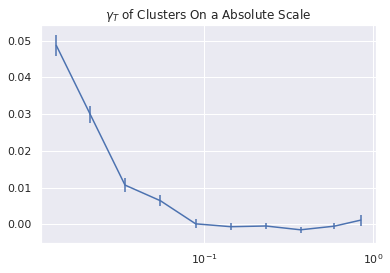

[-72.8825 -93.0708 -52.5981 -51.8193  -1.6537  14.1954  14.7794  62.1652
  20.5802 -11.3641]
------------------------------------------------------------------------------
[ -6473.4803 -12017.4633 -16684.5622 -23499.21   -32286.1992 -41754.7944
 -46281.6882 -40892.9798 -21077.1094  -1700.9946]
------------------------------------------------------------------------------
[ 1497.  3113.  4927.  8098. 13333. 21519. 31634. 41339. 39818. 10108.]
------------------------------------------------------------------------------
[-0.0487 -0.0299 -0.0107 -0.0064 -0.0001  0.0007  0.0005  0.0015  0.0005
 -0.0011]
------------------------------------------------------------------------------
[-4.3243 -3.8604 -3.3864 -2.9019 -2.4215 -1.9404 -1.463  -0.9892 -0.5293
 -0.1683]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

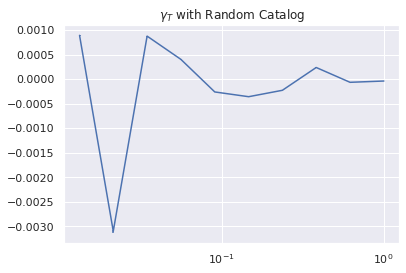

[ 8.9371e-04 -3.0974e-03  8.7790e-04  4.0420e-04 -2.5962e-04 -3.5651e-04
 -2.2586e-04  2.3870e-04 -6.3292e-05 -3.6901e-05]
[-8.1827e-06  2.8360e-05 -8.0379e-06 -3.7008e-06  2.3770e-06  3.2642e-06
  2.0679e-06 -2.1855e-06  5.7949e-07  3.3786e-07]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

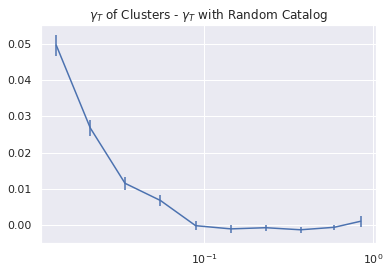

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

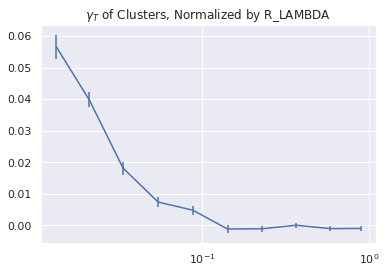

[-46.2363 -90.4433 -71.6589 -46.8967 -49.5313  19.0895  27.3736  -2.271
  43.9127  27.3263]
------------------------------------------------------------------------------
[ -3519.3394  -8762.1729 -13373.9469 -18369.0863 -24935.2204 -32916.1263
 -38530.8058 -37069.9915 -23423.4808  -3260.8189]
------------------------------------------------------------------------------
[  816.  2271.  3943.  6315. 10265. 16869. 26092. 36921. 43809. 28348.]
------------------------------------------------------------------------------
[-5.6662e-02 -3.9825e-02 -1.8174e-02 -7.4262e-03 -4.8253e-03  1.1316e-03
  1.0491e-03 -6.1510e-05  1.0024e-03  9.6396e-04]
------------------------------------------------------------------------------
[-4.3129 -3.8583 -3.3918 -2.9088 -2.4291 -1.9513 -1.4767 -1.004  -0.5347
 -0.115 ]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)